In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [3]:
#sys.path.append("../..")
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

from testing.test_utils import load_test_output_pn


In [5]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [24]:
############# define run locations #############
mp_locs = ['/home/jtindall/short_tank/short_tank_run_1/outputs',
           '/home/jtindall/short_tank/short_tank_run_2/outputs',
           '/home/jtindall/short_tank/short_tank_run_3/outputs',
           '/home/jtindall/short_tank/short_tank_run_4/outputs',
           '/home/jtindall/short_tank/short_tank_run_5/outputs',
           '/home/jtindall/short_tank/short_tank_run_6/outputs',
           '/home/jtindall/short_tank/short_tank_run_7/outputs',
           '/home/jtindall/short_tank/short_tank_run_8/outputs'
          ]

mp_titles = ['Short Tank Run 1',
             'Short Tank Run 2',
             'Short Tank Run 3',
             'Short Tank Run 4',
             'Short Tank Run 5',
             'Short Tank Run 6',
             'Short Tank Run 7',
             'Short Tank Run 8'
        ]

new_locs = []

new_titles = []

"""
new_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9]]
new_linestyle = ['--','--','--','--','--','--','--','--','--','--']

old_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7]]
old_linestyle = [':',':',':',':',':',':',':',':']
"""

mp_linecolor = [c[0] for _ in mp_locs]
mp_linestyle = ['--' for _ in mp_locs]

new_linecolor = [c[1] for _ in new_locs]
new_linestyle = [':' for _ in new_locs]

locs = mp_locs + new_locs
titles = mp_titles + new_titles
linecolor = mp_linecolor + new_linecolor
linestyle = mp_linestyle + new_linestyle


i:  0
Found training logs:  ['/home/jtindall/short_tank/short_tank_run_1/outputs/log_train_0.csv']
i:  1
Found training logs:  ['/home/jtindall/short_tank/short_tank_run_2/outputs/log_train_0.csv']
i:  2
Found training logs:  ['/home/jtindall/short_tank/short_tank_run_3/outputs/log_train_0.csv']
i:  3
Found training logs:  ['/home/jtindall/short_tank/short_tank_run_4/outputs/log_train_0.csv']
i:  4
Found training logs:  ['/home/jtindall/short_tank/short_tank_run_5/outputs/log_train_0.csv']
i:  5
Found training logs:  ['/home/jtindall/short_tank/short_tank_run_6/outputs/log_train_0.csv']
i:  6
Found training logs:  ['/home/jtindall/short_tank/short_tank_run_7/outputs/log_train_0.csv']
i:  7
Found training logs:  ['/home/jtindall/short_tank/short_tank_run_8/outputs/log_train_0.csv']


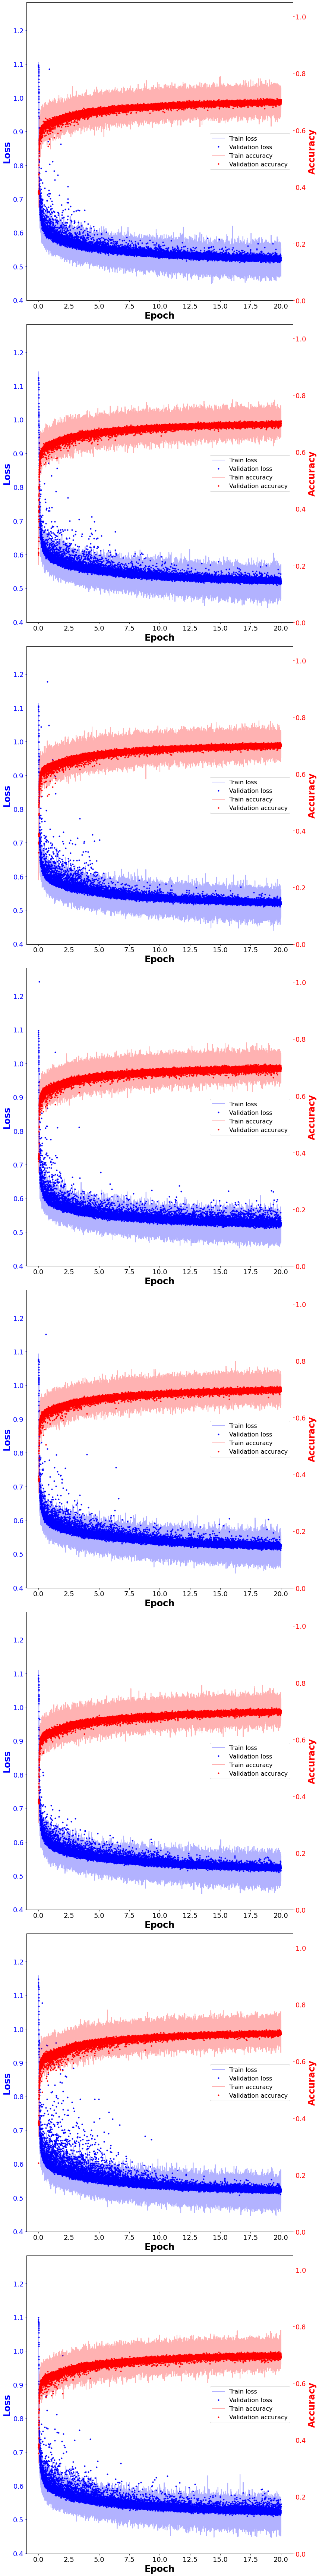

In [7]:
#fig = multi_disp_learn_hist(mp_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [22]:
############# load new run data #############
idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_fulltank_300_post_veto_nomichel_pe_idxs.npz'
indices = np.load(idx_file_path)['test_idxs']

cut_path = '/home/jtindall/indices/pointnet_cut_indices.npz'

# TODO: incorporate fitqun flags
cuts_to_apply= []

#mp_raw_predicted_labels = [np.load(loc + "/predictions.npy") for loc in mp_locs]
mp_raw_output_softmax   = [np.load(loc + "/softmax.npy") for loc in mp_locs]
mp_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in mp_locs]

In [23]:
############# load old run data #############

new_outputs = [load_test_output_pn(os.path.join(loc,'test_validation_iteration_dump.npz'),
                                   cut_path,
                                   np.load(idx_file_path)['test_idxs'], cut_list=[])
               for i, loc in enumerate(new_locs)]

new_raw_output_softmax   = [output["softmax"] for output in new_outputs]
new_raw_actual_labels    = [output["labels"] for output in new_outputs]
#new_raw_predicted_labels = [output["predictions"] for output in new_outputs]

data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)


In [10]:
############# combine run data #############
#raw_predicted_labels = mp_raw_predicted_labels + new_raw_predicted_labels
raw_output_softmax   = mp_raw_output_softmax + new_raw_output_softmax
raw_actual_labels    = mp_raw_actual_labels + new_raw_actual_labels

In [11]:
############# apply cuts to data #############
#predicted_labels = multi_get_masked_data(raw_predicted_labels, cut_path, indices, cuts_to_apply)
output_softmax   = multi_get_masked_data(raw_output_softmax, cut_path, indices, cuts_to_apply)
actual_labels    = multi_get_masked_data(raw_actual_labels, cut_path, indices, cuts_to_apply)

In [12]:
############# plot multi e/gamma ROC #############
fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


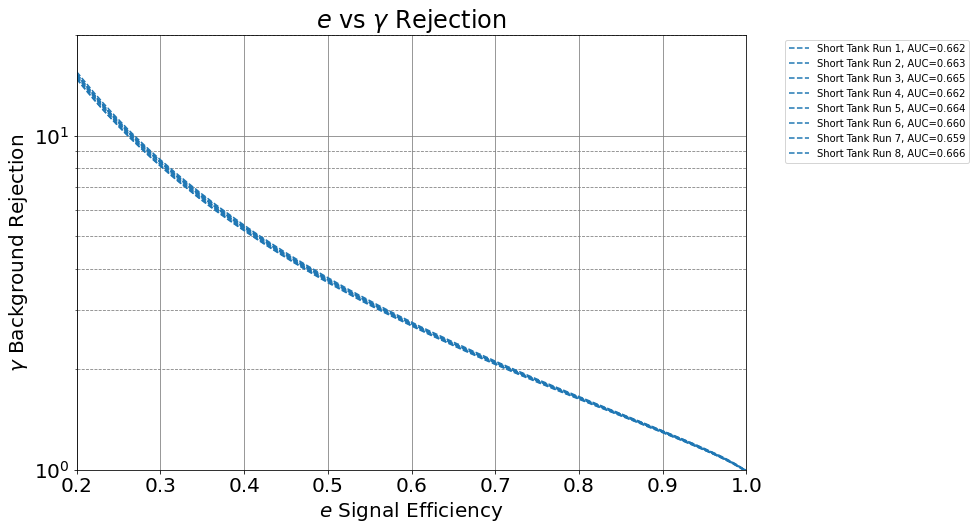

In [13]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], xlims=[[0.2,1.0]],ylims=[[1e0,2e1]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

In [14]:
############# plot multi e/mu ROC #############
fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]


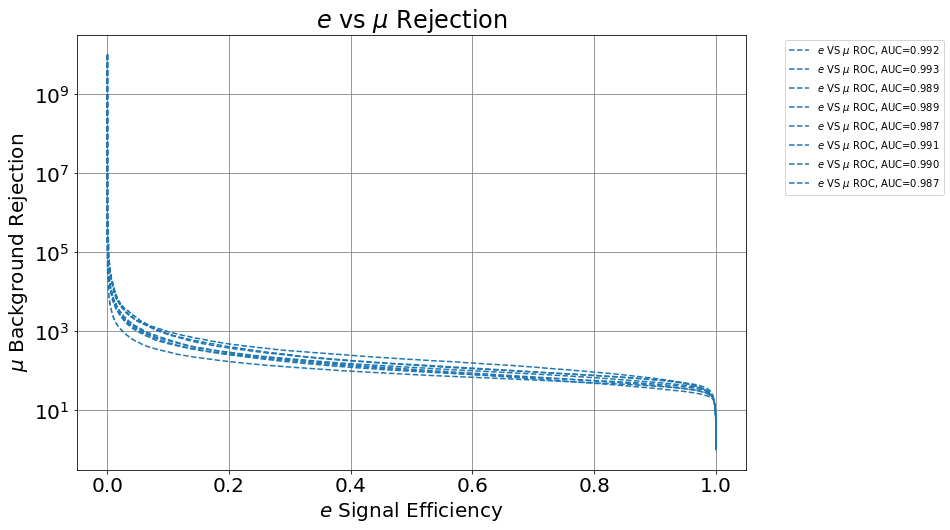

In [15]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\mu$", fig_list=[1], 
                      linestyles=linestyle,linecolors=linecolor, show=False)

In [16]:
############# plot collapsed ROC #############
"""
plot_list=["$e$", "$\gamma$"]
vs_list=["$\mu$"]
"""
collapsed_class_scores_list, collapsed_class_labels_list = multi_collapse_test_output(output_softmax, actual_labels, label_dict, ignore_type='$\gamma$')

collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in collapsed_class_labels_list]
collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in collapsed_class_scores_list]

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]


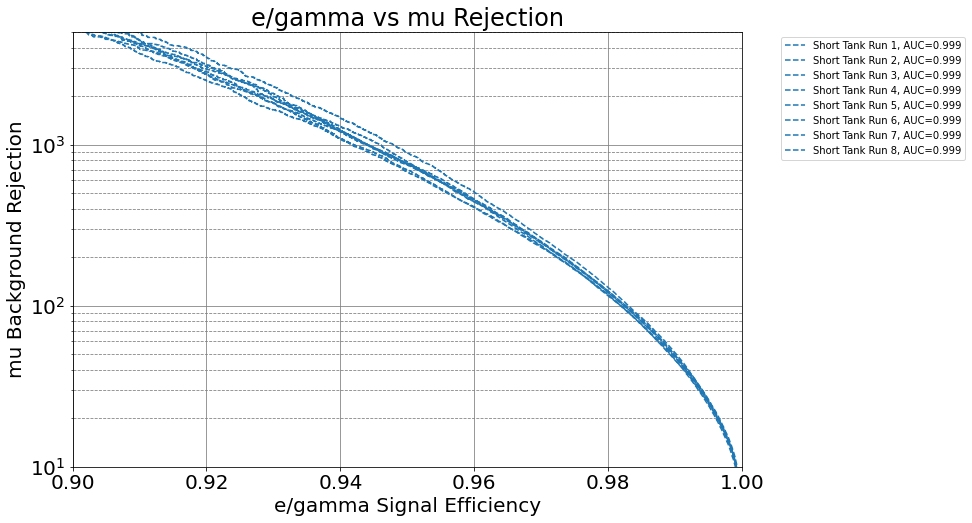

In [17]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

fpr_list, tpr_list, thr_list = multi_compute_roc(collapsed_class_scores_list, collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

figs = multi_plot_roc(fpr_list, tpr_list, thr_list,"e/gamma", "mu", 
                      fig_list=[1], xlims=[[0.9,1.0]],ylims=[[1e1,5e3]], 
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)

In [18]:
# Compute stddev
from statistics import stdev

sample_efficiencies = [0.90, 0.94, 0.98]
def compute_stdevs(test_tpr_list, test_fpr_list, N, symbol):
    rejections_list = [1.0/(fpr+1e-10) for fpr in test_fpr_list]

    compute_indices_list = np.array([[np.argmin(abs(tpr - value)) for value in sample_efficiencies] for tpr in test_tpr_list])
    #print(compute_indices_list)

    test_sample_efficiencies = np.array([tpr[compute_indices] for tpr, compute_indices in zip(test_tpr_list, compute_indices_list)])
    #print(test_sample_efficiencies)

    rejections = np.array([rejections[compute_indices] for rejections, compute_indices in zip(rejections_list, compute_indices_list)])
    #print(rejections)

    stdevs  = [stdev(rejections[:, i]) for i in range(rejections.shape[1])]
    d_stdevs = [std / np.sqrt(2*N) for std in stdevs]
    #print(stdevs)

    for std, sample_efficiency, d_stdev in zip(stdevs, sample_efficiencies, d_stdevs):
        print("sample efficiency: ", sample_efficiency , " σ: ", std, " σ/sqrt(2{}): ".format(symbol), d_stdev)
    
    return stdevs, d_stdevs


In [19]:
#compute_stdevs(tpr_list, fpr_list, N = len(locs))

In [20]:
cap = len(mp_locs)
print("There are ", cap, "MP runs")
print("\n MP runs:")
sigma_mp, d_sigma_mp = compute_stdevs(tpr_list[:cap], fpr_list[:cap], N = len(mp_locs), symbol="N")

print("\npre-MP runs:")
sigma, d_sigma = compute_stdevs(tpr_list[cap:], fpr_list[cap:], N = len(new_locs), symbol="N")

There are  8 MP runs

 MP runs:
sample efficiency:  0.9  σ:  724.7103752561712  σ/sqrt(2N):  181.1775938140428
sample efficiency:  0.94  σ:  118.37551338510552  σ/sqrt(2N):  29.59387834627638
sample efficiency:  0.98  σ:  4.6214645919287385  σ/sqrt(2N):  1.1553661479821846

pre-MP runs:


IndexError: tuple index out of range

In [ ]:
for sample_efficiency, std_1, d_stdev_1, std_2, d_stdev_2, in zip(sample_efficiencies, sigma_mp, d_sigma_mp, sigma, d_sigma):
        diff = std_2 - std_1
        sigma_diff = np.sqrt(d_stdev_1**2 + d_stdev_2**2)
        print("sample efficiency: ", sample_efficiency , " (σ - σ_MP): ", diff, " σ_(σ - σ_MP): ", sigma_diff)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8),facecolor="w")

sample_efficiencies = [0.90, 0.94, 0.98]
rejections_list = [1.0/(fpr+1e-10) for fpr in fpr_list]

compute_indices_list = np.array([[np.argmin(abs(tpr - value)) for value in sample_efficiencies] for tpr in tpr_list])
#print(compute_indices_list)

test_sample_efficiencies = np.array([tpr[compute_indices] for tpr, compute_indices in zip(tpr_list, compute_indices_list)])
#print(test_sample_efficiencies)

rejections = np.array([rejections[compute_indices] for rejections, compute_indices in zip(rejections_list, compute_indices_list)])
#print(rejections)

for i in range(len(rejections)):
    ax.scatter(np.array(sample_efficiencies), rejections[i], color=linecolor[i])
ax.set_yscale('log')
ax.grid(b=True, which='major', color='gray', linestyle='-')
ax.grid(b=True, which='minor', color='gray', linestyle='--')
ax.set_xlim(0.9,1.0)
ax.set_ylim(1e1,5e3)

plt.show()